In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#funkcije

def sigmoid(x):
    return 1/(1+ np.e**(x))

#fja greske
def E(X,Y):
    return np.sum((X-Y)**2)

#izvod od E po w, parametar k je sloj
def dE(k):
    return 2*h[k]

#regularizacija
def omega(W,reg_param):
    S = 0;
    for i in range(0,L):
        S+=np.sum(W[i]**2)
    return reg_param*S

#fja cene
def Cost(X,Y,W,reg_param):
    return E(X,Y)*0.5 + 0.5*omega(W,reg_param)

#forward pass
def forward(X,a,h,W,B,L,e,o,c):
    for i in range(0,L):
        if (i == 0):
            a[i] = X
            h[i] = X
        elif (i == L-1):
            a[i] = W[i-1].dot(h[i-1]) + B[i-1]
            h[i] = a[i]
        else:
            a[i] = W[i-1].dot(h[i-1]) + B[i-1]
            h[i] = sigmoid(a[i])

    e = E(h[L-1],Y)
    o = omega(W,reg_param)
    c = Cost(h[L-1],Y,W,reg_param)
    return (a,h,e,o,c)

#backward pass
def back(h,W,dW,dB,L,reg_param):
    d = 0.5*dE(L-1)
    k = L-1
    while k>=0:
        if(k == L-1):
            d = d
        else:
            d = d * ((1 - h[k])*(h[k]))

        dB[k] = d 

        if k>0:
            dW[k] = d.dot(h[k-1].T)  + reg_param*W[k]
        else:
            dW[k] = d + reg_param*W[k]
        d = W[k].T.dot(d)    
        k= k-1
    return (dW,dB)

#fja radi forward pass, pa backward pass i menja vrednost W i B na osnovu gradijenta i brzine ucenja
def iteracija(X,a,h,W,B,L,e,o,c,dW,dB,reg_param,ni):
    (a,h,e,o,c) = forward(X,a,h,W,B,L,e,o,c)
    (dW,dB) = back(h,W,dW,dB,L,reg_param)
    W = W - ni * dW
    B = B - ni * dB
    return (X,a,h,W,B,L,e,o,c,dW,dB)


In [3]:
#inicijalizacije
#ulazni podaci
reg_param = 0.1

#L broj slojeva
L =3
# N broj ulaza
N = 5

#batch size, radi samo za n=1
n=1

#brzina ucenja
ni = 0.1

In [4]:
#ocekivane vrednosti
Y = np.random.randn(N,n)
#Y = -11*np.ones((N,n))

In [5]:
#ulaz
X = np.random.randn(N,n)
#X = np.zeros((N,n))

In [6]:
#tezine
W= [ np.random.randn(N,N), np.random.randn(N,N), np.random.randn(N,N)]
#W = [ np.zeros((N,N)), np.ones((N,N)), np.ones((N,N))]

In [7]:
#bias
B = [ np.random.randn(N,n), np.random.randn(N,n), np.random.randn(N,n)]

In [8]:
#init ostalog

#sume W*h
a = np.empty([L,N,n])

# h = sigmoid(a)
h = np.empty([L,N,n])

#greska
e= 0

#regularizcija
o = 0
# c = e +o
c = 0
dW = np.empty([L,N,N])
dB = np.empty([L,N,n])

#broj iteracija
O = 500

#cene iteracija 
niz = np.empty(O)

#iteracije
for i in range(0,O):
    (X,a,h,W,B,L,e,o,c,dW,dB)=iteracija(X,a,h,W,B,L,e,o,c,dW,dB,reg_param,ni)
    niz[i] = c

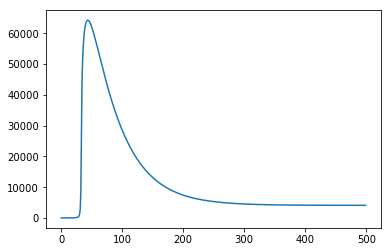

In [9]:
# broj iteracije na x osi, cena na y
plt.plot(np.arange(O),niz)
#plt.plot(np.arange(O),np.log(niz))